<a href="https://colab.research.google.com/github/ucfilho/Metodos_Numericos_2021/blob/main/Mod_03_class_12_Shooting_Methods_PVC_jun_01_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# http://acme.byu.edu/wp-content/uploads/2016/01/Lab-3-Shooting.pdf

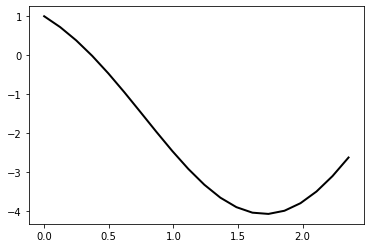

In [ ]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
4
# y'' +4y = -9sin(x), y(0) = 1., y(3*pi/4.) = -(1.+3*sqrt(2))/2., y'(0) = -2
6 # Exact Solution: y(x) = cos(2x) + (1/2)sin(2x) - 3sin(x)
def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 0
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
      sol0 = odeint(f,np.array([alpha,t0]), [a,b],atol=1e-10)[1,0]

      sol1 = odeint(f,np.array([alpha,t1]), [a,b],atol=1e-10)[1,0]
      t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
      t0 = t1
      t1 = t2
      i = i+1
    if i == maxI:
      print("t not found")
    return t2


def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
  t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
  sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
  return sol

def ode(y,x):
  return np.array([y[1], -4*y[0]-9*np.sin(x)])

X = np.linspace(0,3*np.pi/4,20)
Y = solveSecant(ode,X,0,3*np.pi/4,1,-(1.+3*np.sqrt(2)) /2, (1+(1.+3*np.sqrt(2)) /2)/(-3*np.pi/4),-1,40)
plt.plot(X,Y,'-k',linewidth=2)
plt.show()